# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [43]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [44]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

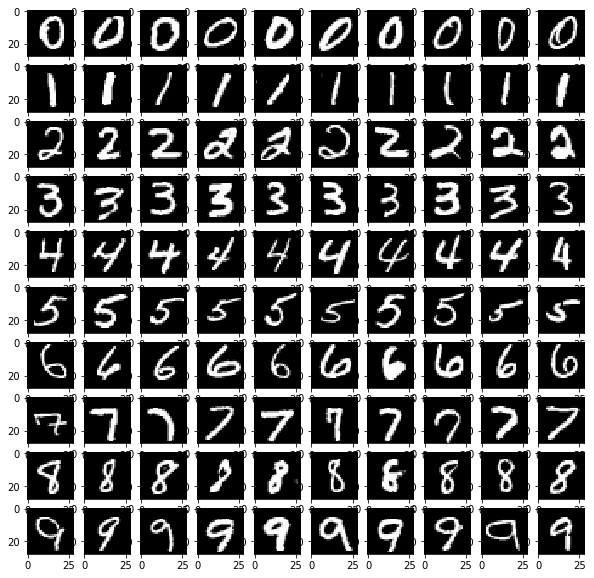

In [47]:
#def P1(num_examples=10):

### STUDENT START ###
def P1(num_examples = 10):
    yList = []
    
    # loop for 1 - 10
    for num in range(10):
        index = [i for i, x in enumerate(Y) if x == num][:num_examples]
        yList.append(index)
    
    # plot them
    plt.figure(figsize = (10, 10))
    for i in range(num_examples):
        for j in range(10):
            plt.subplot2grid((10, num_examples), (j, i))
            plt.imshow(X[yList[j][i]].reshape(28,28), cmap = 'gray')    

P1(10)
            
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [58]:
#def P2(k_values):

### STUDENT START ###

# create our list of k values
kVals = [1, 3, 5, 7, 9]

def P2(k_values = 1):
    # loop through the different k values, printing accuracy for each
    for k in kVals:
        # train the classification model
        miniKNN = KNeighborsClassifier(n_neighbors=k)
        miniKNN.fit(mini_train_data, mini_train_labels)
        
        # model predicts from dev data
        miniScore = miniKNN.predict(dev_data)
        
        # print results
        print('Classification Model when k =', k)
        
        targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        print(classification_report(dev_labels, miniScore, target_names = targets))
        
P2(k_values)

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Classification Model when k = 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Classification Model when k = 3
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.82      0.98      0.90       118
           2  

ANSWER:

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [50]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

def P3(train_sizes, accuracies):

    for size in train_sizes:
        start = time.time()   
        
        # train the classifier
        trainKNN = KNeighborsClassifier(n_neighbors = 1)
        trainKNN.fit(train_data[:size], train_labels[:size])
        
        # score the dev data
        scoreKNN = trainKNN.predict(dev_data)
        
        # count correct and incorrect predictions
        correct, total = 0, 0
        for pred, label in zip(scoreKNN, dev_labels):
            if pred == label:
                correct += 1
            total += 1
        accuracies.append(correct/total)

        end = time.time()
        totalTime = end - start
        
        # print our output
        print(f'Training set size: {size:d}  completion time: {totalTime: 0.2f}s  correct: {correct:d}  total: {total:d}  accuracy: {correct/total: 0.2f}')

accuracies = []
P3(train_sizes, accuracies)

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Training set size: 100  completion time:  0.11s  correct: 702  total: 1000  accuracy:  0.70
Training set size: 200  completion time:  0.21s  correct: 791  total: 1000  accuracy:  0.79
Training set size: 400  completion time:  0.46s  correct: 811  total: 1000  accuracy:  0.81
Training set size: 800  completion time:  0.88s  correct: 866  total: 1000  accuracy:  0.87
Training set size: 1600  completion time:  1.91s  correct: 905  total: 1000  accuracy:  0.91
Training set size: 3200  completion time:  3.88s  correct: 927  total: 1000  accuracy:  0.93
Training set size: 6400  completion time:  7.94s  correct: 939  total: 1000  accuracy:  0.94
Training set size: 12800  completion time:  16.52s  correct: 952  total: 1000  accuracy:  0.95
Training set size: 25000  completion time:  36.30s  correct: 962  total: 1000  accuracy:  0.96


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Linear regression prediction for n = 60000 is 1.24
Linear regression transformation prediction for log(1 / (1 - accuracy)) is 3.64
Transformation model accuracy is 0.97


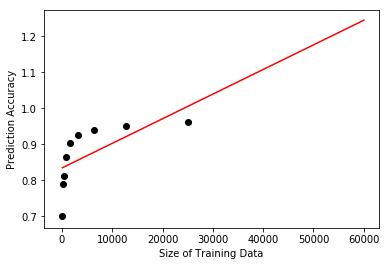

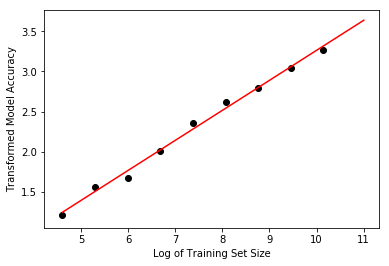

In [51]:
#def P4():
    
### STUDENT START ###
n = [60000]
regressModel = [[100], n]

def P4():
    
    # train model
    trainLR = LinearRegression().fit(np.array(train_sizes).reshape(-1,1), np.array(accuracies))

    # score the test data
    scoreLR = trainLR.predict(regressModel)
    print("Linear regression prediction for n = 60000 is %.2f" % scoreLR[1])

    # visualize the predictions
    fig1, ax1 = plt.subplots()
    plt.plot(regressModel, scoreLR, color='red')
    plt.scatter(train_sizes, accuracies,  color='black')
    ax1.set_xlabel("Size of Training Data")
    ax1.set_ylabel("Prediction Accuracy")
    
    # transform data and train the model
    trainLog = np.log(train_sizes)
    trainLog2 = np.log(1 / (1 - np.array(accuracies)))
    logLR = LinearRegression().fit(trainLog.reshape(-1,1), trainLog2)
    
    # score test data
    logAcc = logLR.predict(np.log(regressModel))
    log2Acc = (1 - 1 / np.exp(logAcc[1]))
    print("Linear regression transformation prediction for log(1 / (1 - accuracy)) is %.2f" % logAcc[1])
    print("Transformation model accuracy is %.2f" % log2Acc)

    # visualize the transformed predictions
    fig2, ax2 = plt.subplots()
    plt.plot(np.log(regressModel), logAcc, color='red')
    plt.scatter(trainLog, trainLog2,  color='black')
    ax2.set_xlabel("Log of Training Set Size")
    ax2.set_ylabel("Transformed Model Accuracy")

P4()

### STUDENT END ###

#P4()

ANSWER:

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix, without normalization
[[105   1   0   0   0   0   0   0   0   0]
 [  0 117   0   0   0   0   0   0   1   0]
 [  1   0 102   0   0   0   0   2   1   0]
 [  0   1   0  92   0   2   0   1   1   0]
 [  0   0   0   0  92   0   0   0   0   0]
 [  1   0   0   2   0  83   1   0   0   1]
 [  0   0   0   0   0   1 100   0   1   0]
 [  0   0   1   0   0   0   0 101   0   0]
 [  1   1   2   2   1   0   2   0  85   0]
 [  0   0   0   0   1   0   0   0   0  94]]
Normalized confusion matrix
[[0.99 0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.   0.96 0.   0.   0.   0.   0.02 0.01 0.  ]
 [0.   0.01 0.   0.95 0.   0.02 0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.02 0.   0.94 0.01 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.01 0.98 0.   0.01 0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.99 0.   0.  ]
 [0.01 0.01 0.02 0.02 0.01 0.   0.02 0.   0.9  0.  ]
 [0.   0.   0.   0.   0.

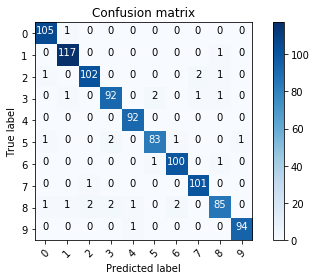

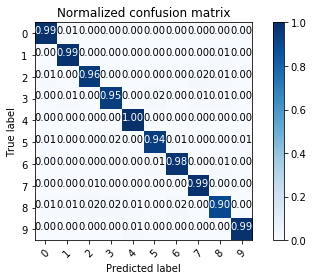

In [62]:
#def P5():

### STUDENT START ###

import itertools

def P5():
    
    # train the classifier then score the dev data
    trainKNN5 = KNeighborsClassifier(n_neighbors = 1)
    trainKNN5.fit(train_data, train_labels)
    scoreKNN5 = trainKNN5.predict(dev_data)
    
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(dev_labels, scoreKNN5)
    np.set_printoptions(precision=2)
    # end from sklearn confusion matrix documentation
        
    # plot the confusion matrix
    targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=targets, normalize=False,
                          title='Confusion matrix')
    
    # plot the normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=targets, normalize=True,
                          title='Normalized confusion matrix')

    # the plots show us that the most confused digits are 5 & 8

P5()
### STUDENT END ###

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [66]:
#def P6():
    
### STUDENT START ###

def P6(dataBlur):

    gaussBlur = np.zeros(dataBlur.shape)
    for item, image in enumerate(dataBlur):
        newMatrix = np.zeros([30,30])
        
        # use zeros to make it nicer
        newMatrix[1:29, 1:29] = image.reshape(28,28)
        matrix_gb = np.zeros([30,30])
        # For each pixel in 28x28 matrix, take average of pixel and 8 surrounding pixels
        for i in np.arange(1,29):
            for j in np.arange(1,29):
                matrix_gb[i, j] = 1/9 * (newMatrix[i-1, j-1] + newMatrix[i-1, j] + newMatrix[i-1, j+1]
                                    + newMatrix[i, j-1] + newMatrix[i,j] + newMatrix[i, j+1]
                                    + newMatrix[i+1, j-1] + newMatrix[i+1, j] + newMatrix[i+1, j+1])
        gaussBlur[item] = matrix_gb[1:29, 1:29].reshape(784,)
    return dataBlur

trainBlurData = P6(train_data)
devBlurData = P6(dev_data)

# check some different options

# no blur
noBlur = KNeighborsClassifier(n_neighbors=1)
noBlur.fit(train_data, train_labels)
noBlurScore = noBlur.predict(dev_data)

targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print('Classification report for k = 1 with no alterations')
print(classification_report(dev_labels, noBlurScore, target_names=targets))
print('')

# blur the training data
trainBlur = KNeighborsClassifier(n_neighbors=1)
trainBlur.fit(trainBlurData, train_labels)
trainBlurScore = trainBlur.predict(dev_data)

targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print('Classification report for k = 1 with training data blurred')
print(classification_report(dev_labels, trainBlurScore, target_names=targets))
print('')

# blur the dev data
devBlur = KNeighborsClassifier(n_neighbors=1)
devBlur.fit(train_data, train_labels)
devBlurScore = devBlur.predict(devBlurData)

targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print('Classification report for k = 1 with training data blurred')
print(classification_report(dev_labels, devBlurScore, target_names=targets))
print('')

# blur the training AND dev data
allBlur = KNeighborsClassifier(n_neighbors=1)
allBlur.fit(trainBlurData, train_labels)
allBlurScore = allBlur.predict(dev_data)

targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print('Classification report for k = 1 with training data blurred')
print(classification_report(dev_labels, allBlurScore, target_names=targets))
print('')

### STUDENT END ###

#P6()

Classification report for k = 1 with no alterations
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.97      0.99      0.98       118
           2       0.97      0.96      0.97       106
           3       0.96      0.95      0.95        97
           4       0.98      1.00      0.99        92
           5       0.97      0.94      0.95        88
           6       0.97      0.98      0.98       102
           7       0.97      0.99      0.98       102
           8       0.96      0.90      0.93        94
           9       0.99      0.99      0.99        95

   micro avg       0.97      0.97      0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000


Classification report for k = 1 with training data blurred
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [67]:
#def P8(alphas):

### STUDENT START ###
# https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

def P8(alphas):

    bernGS = GridSearchCV(BernoulliNB(binarize = 0.1), alphas, scoring = 'accuracy')
    bernGS.fit(mini_train_data, mini_train_labels)
    return bernGS  

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

accuracy = []
myAlpha = []

# this won't work anymore?
# https://github.com/scikit-learn/scikit-learn/issues/11198
for i in nb.grid_scores_:
    accuracy.append(i.mean_validation_score)
    myAlpha.append(i.parameters['alpha'])
    print(i)

plt.scatter(myAlpha, accuracy)
plt.xlabel('Accuracy')
plt.ylabel('Alpha')
plt.title('Comparing alpha vs. bernoulli accuracy')
plt.show()


### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter wil

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [79]:
#def P9():

### STUDENT END ###

def P9():
    gnb = GaussianNB()
    gnb.fit(train_data, train_labels)
    return gnb

gnb = P9()
print('GaussianNB model accuracy: %3.2f' %gnb.score(dev_data, dev_labels))

gnbScore = gnb.predict(dev_data)

# examine the parameters estimated by the fit() method, theta_ and sigma_
print('mean of theta: ', np.mean(gnb.theta_), '. mean of sigma: ', np.mean(gnb.sigma_))
print('SD of theta: ', np.std(gnb.theta_), '. SD of sigma: ', np.std(gnb.sigma_))
print('')

# 
gnb.sigma_ = np.full(gnb.sigma_.shape, 1)
gnbScore2 = gnb.predict(dev_data)

print('new sigma:')
print('GaussianNB model accuracy: %3.2f' %gnb.score(dev_data, dev_labels))
print('')

# build the classification report for new sigma
print('classification report for GaussianNB model')
targets = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print(classification_report(dev_labels, gnbScore2, target_names=targets))
print('Confusion matrix: \n', confusion_matrix(dev_labels, gnbScore2))
print('')

### STUDENT END ###

#gnb = P9()

GaussianNB model accuracy: 0.59
mean of theta:  0.13168133661406808 . mean of sigma:  0.05363827240628986
SD of theta:  0.2047552777734485 . SD of sigma:  0.07014157468613741

new sigma:
GaussianNB model accuracy: 0.81

classification report for GaussianNB model
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       106
           1       0.79      0.96      0.87       118
           2       0.84      0.66      0.74       106
           3       0.71      0.79      0.75        97
           4       0.77      0.85      0.81        92
           5       0.83      0.65      0.73        88
           6       0.83      0.89      0.86       102
           7       0.90      0.90      0.90       102
           8       0.69      0.67      0.68        94
           9       0.75      0.72      0.73        95

   micro avg       0.81      0.81      0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

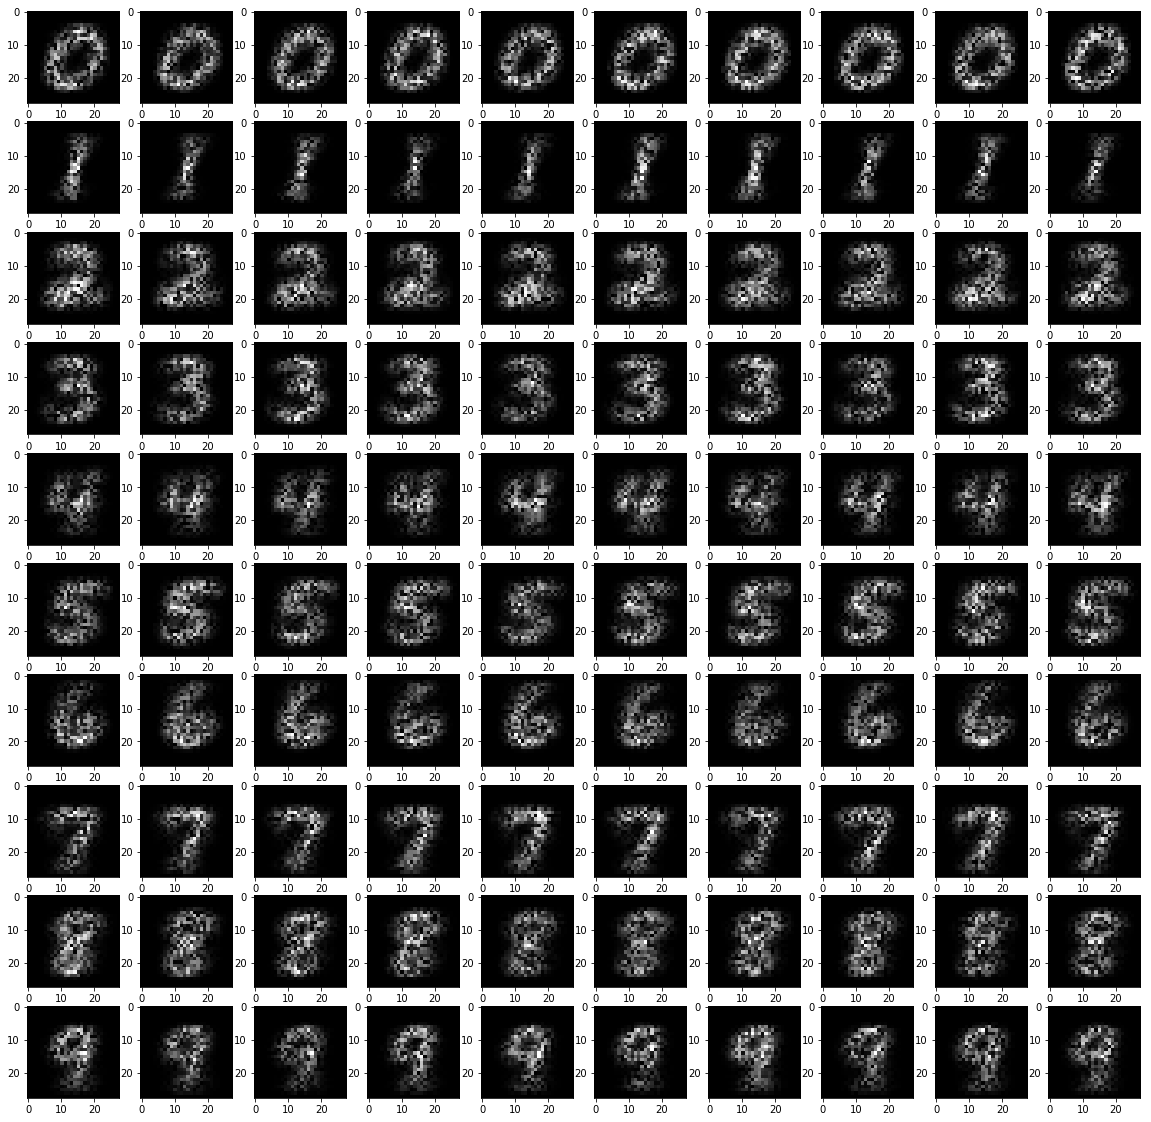

In [82]:
#def P10(num_examples):

### STUDENT START ###

def P10(num_examples = 10):
    
    plt.figure(figsize = (20, 20))
    
    # train the model on training data
    gen = BernoulliNB(binarize = 0.5)
    gen.fit(train_data, train_labels)
    
    # plot the generated data
    for i in range(10):
        for j in range(num_examples):
            plt.subplot2grid((10, num_examples), (i, j))
            plt.imshow((np.exp(gen.feature_log_prob_)[i] * np.random.rand(28*28)).reshape(28, 28), cmap = 'gray')

P10(10) 

### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [93]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

def P11(buckets, correct, total):
    
    # train classification model on mini data
    bNB = BernoulliNB(alpha = 0.3)
    bNB.fit(mini_train_data, mini_train_labels)
    
    # score the dev data
    bNBscore = bNB.predict(dev_data)
    bNBprobs = bNB.predict_proba(dev_data)

#    correct, total = 0, 0
    for score, probs, lab in zip(bNBscore, bNBprobs, dev_labels):
        index = -1
        probs = probs[int(score)]
        
        # bucket the probabilities
        for i in range(len(buckets) - 1):
            if (buckets[i] <= probs) and (probs < buckets[i+1]):
                index = i
                break
        
        # add to our counter
        total[index] += 1
        correct[index] += int(score == lab)

# given
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
        
P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))
                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =  35    accuracy = 0.371
p(pred) <= 0.9000000000000    total =  71    accuracy = 0.451
p(pred) <= 0.9990000000000    total =  64    accuracy = 0.500
p(pred) <= 0.9999900000000    total =  51    accuracy = 0.667
p(pred) <= 0.9999999000000    total =  53    accuracy = 0.698
p(pred) <= 0.9999999990000    total =  40    accuracy = 0.750
p(pred) <= 0.9999999999900    total =  46    accuracy = 0.783
p(pred) <= 0.9999999999999    total =  29    accuracy = 0.931
p(pred) <= 1.0000000000000    total = 611    accuracy = 0.948


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()